In [1]:
import pandas as pd
import numpy as np
import re

import urllib.request
from io import StringIO

from collections import defaultdict, Counter

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import spacy

nlp = spacy.load('en_core_web_sm')

In [2]:
URL = 'https://raw.githubusercontent.com/Gautamshahi/FakeCovid/master/data/FakeCovid_July2020.csv'

response = urllib.request.urlopen(URL)
data = response.read()
text = data.decode('utf-8')

# Create dataframe
df = pd.read_csv(StringIO(text), sep=',') # index_col=[0, 1, 2, 3

#uncomment this lines to read from local source for offline work
#df = pd.read_csv('FakeCovid_July2020.csv')

df.head()

,ID,ref_category_title,ref_url,pageid,verifiedby,country,class,title,published_date,country1,country2,country3,country4,article_source,ref_source,source_title,content_text,category,lang
0,FC1,FALSE: The coronavirus is an amplified bacteri...,https://www.poynter.org/?ifcn_misinformation=t...,https://www.poynter.org/ifcn-covid-19-misinfor...,La Silla Vacía,Colombia,FALSE,The coronavirus is an amplified bacteria rela...,2020/06/17,Colombia,NaN,NaN,NaN,https://lasillavacia.com/detector-video-falso-...,poynter,Detector a video falso que dice que el Covid e...,La Silla Vacía usa Cookies para mejorar la exp...,NaN,es
1,FC2,FALSE: A law allows people to go for a run dur...,https://www.poynter.org/?ifcn_misinformation=a...,https://www.poynter.org/ifcn-covid-19-misinfor...,Newtral.es,Spain,FALSE,A law allows people to go for a run during th...,2020/04/09,Spain,NaN,NaN,NaN,https://www.newtral.es/la-broma-de-que-a-los-r...,poynter,La broma de que a los “runners” se les permite...,En los últimos días nos ha llegado una consult...,NaN,es
2,FC3,False: Chinese converting to Islam after reali...,https://www.poynter.org/?ifcn_misinformation=c...,https://www.poynter.org/ifcn-covid-19-misinfor...,FactCrescendo,India,False,Chinese converting to Islam after realizing t...,2020/02/20,India,NaN,NaN,NaN,https://english.factcrescendo.com/2020/02/20/c...,poynter,Are Chinese people converting to Islam in fear...,"The fact behind every news!, Ever since the Wo...",NaN,en
3,FC4,False: Bat market and bat meat are being sold ...,https://www.poynter.org/?ifcn_misinformation=b...,https://www.poynter.org/ifcn-covid-19-misinfor...,France 24 Observers,France,False,Bat market and bat meat are being sold in Wuhan.,2020/01/27,France,NaN,NaN,NaN,https://observers.france24.com/fr/20200130-int...,poynter,"La soupe à la chauve-souris, un plat prisé en ...","عربي, English, Français, Contribuer, فارسی, عر...",NaN,fr
4,FC5,False: You can self-diagnose COVID-19 by holdi...,https://www.poynter.org/?ifcn_misinformation=y...,https://www.poynter.org/ifcn-covid-19-misinfor...,Agência Lupa,Brazil,False,You can self-diagnose COVID-19 by holding you...,2020/03/16,Brazil,NaN,NaN,NaN,https://piaui.folha.uol.com.br/lupa/2020/03/16...,poynter,#Verificamos: É falso que quem consegue prende...,", “O novo CORONA VÍRUS pode não mostrar sinais...",NaN,pt


In [4]:
df2 = df.loc[df['lang'] == 'en'].copy()
def text_clean(x):
    #all lower case and remove slashes and underscores
    x = str(x).lower().replace('\ ', '').replace('_', ' ')
    # remove repeated characters
    x = re.sub(r'([a-z])\1{3,}', r'\1\1', x)
    return x

df2['content_text'] = df2['content_text'].apply(lambda x: text_clean(x))

In [5]:
covid_arts = [nlp(art) for art in df2['content_text']]

In [7]:
def find_entity_occurences(doc,tag = 'ORG'):
    """
    Return a list of actors from `doc` with corresponding occurences.
    
    :param doc: Spacy NLP parsed list of articles
    :return: list of tuples in form
        [('elizabeth', 622), ('darcy', 312), ('jane', 286), ('bennet', 266)]
    """
    
    found_entities = Counter()
    for art in doc:
        for ent in art.ents:
            if ent.label_ == tag:
                found_entities[ent.lemma_] += 1
              
    return found_entities.most_common()

print(find_entity_occurences(covid_arts,'ORG')[:20])
print(find_entity_occurences(covid_arts,'GPE')[:20])

[('afp', 1058), ('cdc', 924), ('the world health organization', 568), ('cnn', 517), ('coronavirus', 500), ('dc\\n20036', 360), ('3rd st', 355), ('fda', 271), ('snopes.com', 266), ("snopes media group inc . '", 265), ('the white supremacist group', 264), ('influenza', 252), ('the white house', 221), ('white house', 208), ('congress', 201), ('the new york times', 190), ('senate', 187), ('\\xa0', 182), ('fox news', 172), ('aap', 171)]
[('china', 2628), ('india', 1606), ('u.s .', 1596), ('wuhan', 828), ('new york', 715), ('us', 704), ('italy', 696), ('the united states', 649), ('connecticut', 368), ('covid-19 .', 311), ('colorado', 289), ('st . louis', 272), ('philippines', 266), ('aurora', 265), ('australia', 264), ('uk', 222), ('kenya', 222), ('ghana', 211), ('california', 186), ('israel', 184)]


In [13]:
common_groups = [item[0] for item in find_entity_occurences(covid_arts,'ORG')[:20]]
common_locations = [item[0] for item in find_entity_occurences(covid_arts,'GPE')[:20]]

In [25]:
common_groups = [
    'afp',
    'cdc',
    'world health organisation',
    'who',
    'cnn',
    'fox news',
    'new york times',
    'trump administration',
    'the white house',
    'congress',
    'senate'
]

common_locations = [
    'india',
    'england', 
    'united states', 
    'us', 
    'uk', 
    'china',
    'italy',
    'spain',
    'canada',
    'europe',
    'asia',
    'america'
]

In [26]:
group_location_dict = defaultdict(Counter)

for art in covid_arts:
    
    group_candidates = []
    location_candidates = []
    
    for ent in art.ents:
        if ent.label_ == 'ORG':
            group_candidates.append(ent.lemma_)
        if ent.label_ == 'GPE':
            location_candidates.append(ent.lemma_)
            
    groups = []
    locations = []
    
    for ent in group_candidates:
        if ent in common_groups and ent not in groups:
            groups.append(ent)
    for loc in location_candidates:
        if loc in common_locations and loc not in locations:
            locations.append(loc)
            
    for found_entity in groups:
        for found_location in locations:
            group_location_dict[found_entity][found_location] += 1

In [27]:
# Transform the dictionary into a pandas DataFrame and fill NaN values with zeroes
group_location_df = pd.DataFrame.from_dict(dict(group_location_dict), dtype=int)
group_location_full_df = group_location_df.fillna(value=0).astype(int)
# Show DF to console
group_location_full_df

,cdc,afp,cnn,senate,congress,the white house,fox news,new york times,world health organisation
china,120,147,115,12,29,32,33,11,0
us,94,145,39,11,15,29,14,5,0
america,22,9,24,10,16,17,12,3,0
italy,17,48,20,0,2,10,10,1,0
canada,17,30,3,2,2,3,2,0,0
england,1,4,3,0,1,0,0,1,0
india,15,61,20,1,13,8,7,2,4
uk,7,31,4,0,0,1,2,2,0
united states,12,2,9,6,4,9,5,5,0
spain,4,21,2,1,1,5,2,3,0


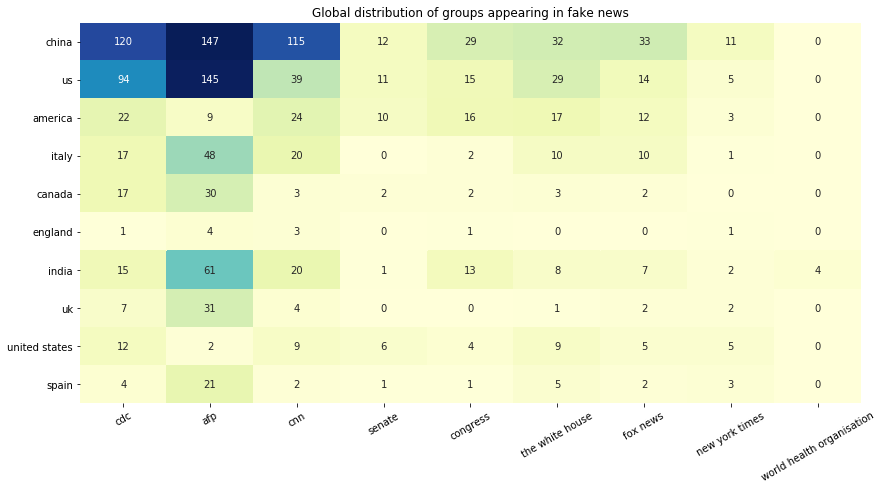

In [33]:
# Seaborn can transform a DataFrame directly into a figure

fig, ax = plt.subplots(figsize=(14,7))
hmap = sns.heatmap(group_location_full_df, ax=ax, annot=True, fmt='d', cmap='YlGnBu', cbar=False)

# Add features using the under the hood plt interface
plt.title('Global distribution of groups appearing in fake news')
plt.xticks(rotation=30)
plt.show()

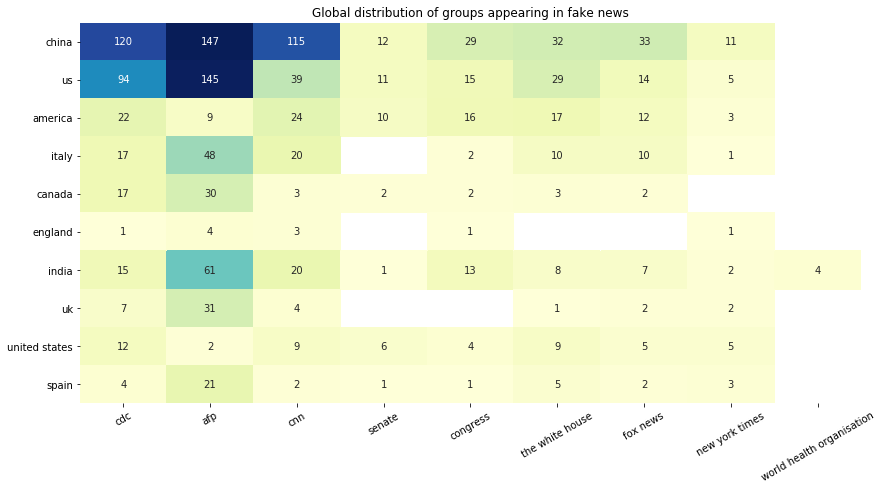

In [34]:
# You can also mask all the zero figures using features of the DataFrame
heat_mask = group_location_df.isnull()

fig, ax = plt.subplots(figsize=(14,7))

hmap = sns.heatmap(group_location_full_df, ax=ax, annot=True, fmt='d', cmap='YlGnBu', cbar=False, mask=heat_mask)

# Add features using the under the hood plt interface
sns.axes_style('white')
plt.title('Global distribution of groups appearing in fake news')
plt.xticks(rotation=30)
plt.show()

In [35]:
fig.savefig('fake_news.png')